## Walking up Empire States Game probability

In [3]:
import numpy as np
np.random.rand()       #Generating pseudo-random numbers using rand function of random package

0.3541474594084363

In [4]:
np.random.seed(123)  #seed numbers match the random numbers, meaning seed(123) is always 0.6964691855978616
np.random.rand()

0.6964691855978616

### Toss a coin function

In [5]:
np.random.seed(123)     #When seed is set to a number, then the result is always same.
coin = np.random.randint(0,2)     # Randomly generate 0 or 1 (2 is not included). .randint generates random integers
print(coin)

if coin == 0:
    print('heads')
else :
    print('tails')

0
heads


- __For generating dice throw, we can do dice = np.random.randint(1,7). This will do the trick.__

- __The following is a code for throwing a dice under the conditions:
      - If dice is 1 or 2, you go one step down.
      - if dice is 3, 4 or 5, you go one step up.
      - Else, you throw the dice again. The number on the dice is the number of steps you go up.__

  

In [14]:
#NumPy should be imported (we already imported above), we need to set the seed.

np.random.seed(123)        # If the seed is not set, then the result will be different at each run.

step = 50

# Roll the dice
dice = np.random.randint(1,7)

# Finish the control construct
if dice <= 2 :
    step = step - 1                               # step -= 1 can also work
elif dice>2 and dice<6 :
    step = step + 1                               # step += 1 also works 
else :
    step = step + dice         # step += dice also works. We add the outcome of dice to the step.

# Print out dice and step
print(dice, step)

6 56


## Random Walk (RaWa)

In [18]:
# NumPy is imported

np.random.seed(123)

# Initialize random_walk
random_walk = [0]       # We create a list named _random walk_ that contains the first step: 0

# The for loop is the same as above. We can iterate in for loop with __range()__ function. The loop runs 50 times.

for x in range(50) :  
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = max(0, step - 1)      # We can't go below 0. So we use max() function to get the biggest of 0 and step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)  # We use new random number to add to step. "Random Walk". Not 'deterministic'

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28]


- Above, second element (which is the first times throwing dice) in the list random_walk is $3$, meaning the dice was $6$. As the for loop dictates, the step will be $0 + 3$.
- If we were used step = step + dice, then it would have been seen that the outcome here and the one before - which is the outcome of _print(dice, step)_, $6 \ 56$ - would be the same. It is because we set the __seed__ at the beginning of each code. Because the outcome at the right above would be [0, 6, 7, 8, 9, 15, 16, 15, 16, 22, ...]


Following is a plot of the random walk.

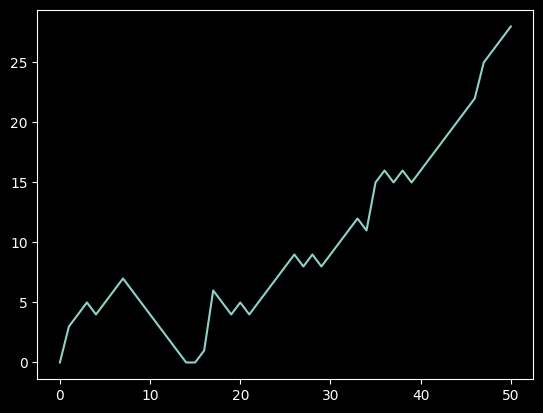

In [8]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

## Disctribution of RaWa

We will put our for loop into another for loop, to simulate throwing dice game a certain number of times. Afterwards, we can get the final steps of each simulation and list them together to see how they are distributed.
But before that, we see how all of random walks are distibuted after simulations.

In [9]:
# Initialize all_walks
np.random.seed(123)
all_walks = []

# Simulate random walk five times
for i in range(5) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append the final step of random_walk to final_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

[[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60], [0, 4, 3, 2, 4, 3, 4, 6, 7, 8, 13, 12, 13, 14, 15, 16, 17, 16, 21, 22, 23, 24, 23, 22, 21, 20, 19, 20, 21, 22, 28, 27, 26, 25, 26, 27, 28, 27, 28, 29, 28, 33, 34, 33, 32, 31, 30, 31, 30, 29, 31, 32, 35, 36, 38, 39, 40, 41, 40, 39, 40, 41, 42, 43, 42, 43, 44, 45, 48, 49, 50, 49, 50, 49, 50, 51, 52, 56, 55, 54, 55, 56, 57, 56, 57, 56, 57, 59, 64, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 71, 73], [0, 2, 1, 2, 3, 6, 5, 6, 5, 6, 7, 8, 7, 8, 7, 8, 9, 11, 10, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 24, 25, 24, 23, 22, 21, 22, 23, 24, 29, 30, 29, 30, 31, 32, 33, 34, 35, 34, 33, 34, 33, 39, 38, 39, 38, 39, 38, 3

__We visualize all walks.__

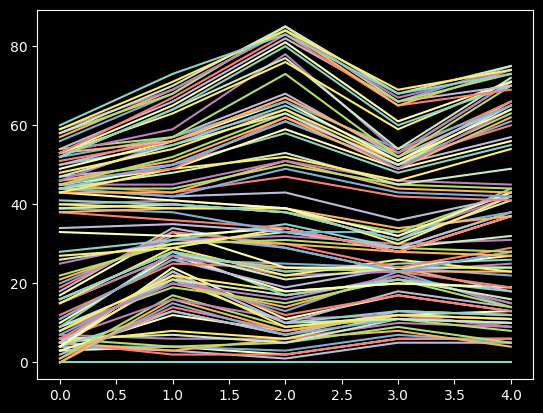

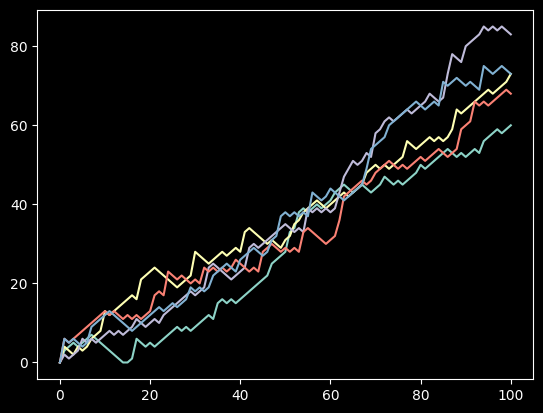

In [10]:
# Convert all_walks to NumPy array: np_aw
np.random.seed(123)
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)     #Now every row in np_aw represents the position after 1 throw for the five random walks.

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

__We are also a bit clumsy. So we have a 0.5% chance of falling down. That calls for another random number generation. So we generate a random float with "np.random.rand()" and see if this value is less than or equal to 0.005, we reset the step to 0.__

On the step 40 of the random walk 49 of the simulation 0 
 we fell down by hitting the chance 0.00413464274939046 and started from the beginning. 

On the step 11 of the random walk 64 of the simulation 0 
 we fell down by hitting the chance 0.002688064574320692 and started from the beginning. 

On the step 71 of the random walk 92 of the simulation 6 
 we fell down by hitting the chance 0.00382720380011059 and started from the beginning. 

On the step 68 of the random walk 89 of the simulation 12 
 we fell down by hitting the chance 0.0023902123445145307 and started from the beginning. 

On the step 25 of the random walk 28 of the simulation 15 
 we fell down by hitting the chance 0.0013381243120085262 and started from the beginning. 

On the step 75 of the random walk 97 of the simulation 16 
 we fell down by hitting the chance 0.004487727046658452 and started from the beginning. 

On the step 35 of the random walk 57 of the simulation 19 
 we fell down by hitting the chance 0.002730

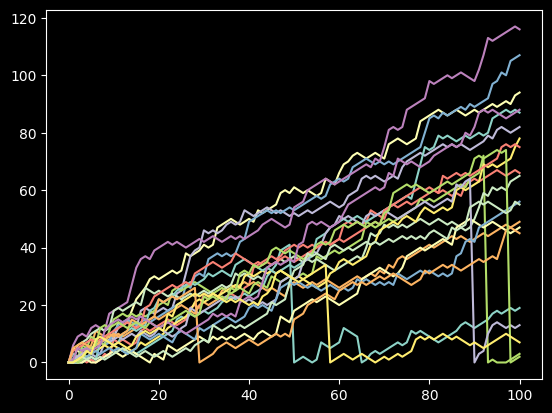

In [11]:
# numpy and matplotlib imported, seed set
np.random.seed(123)
# clear the plot so it doesn't get cluttered if you run this many times
plt.clf()

# Simulate random walk 20 times
all_walks = []
for i in range(20) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        rf = np.random.rand()
        if rf <= 0.005 :
            print('On the step ' + str(step) + ' of the random walk ' + str(x) + ' of the simulation ' + str(i), '\n we fell down by hitting the chance ' + str(rf) + ' and started from the beginning. \n')
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

__If we simulate RaWa 500 times, then we get:__

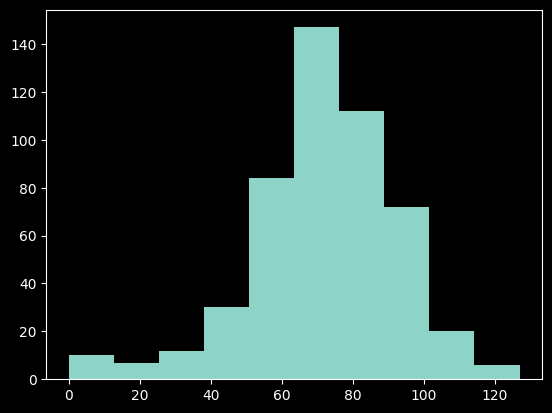

In [12]:
# numpy and matplotlib imported, seed set

np.random.seed(123)
# Simulate random walk 500 times

all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np.array(np_aw_t[-1,:])

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

__What's the estimated chance that you'll reach at least 60 steps high if you play this Empire State Building game? The 'ends' array is everything we need__

In [13]:
count = 0

for x in ends :
    if x >= 60 :
        count = count + 1

poss = count / 500
print(poss)


# We can also have a great NumPy function, np.mean() that directly calculates the mean value.
 
print(np.mean(ends >= 60))

0.784
0.784


__In conclusion, with the possibility of 78.4%, we will reach at least 60 steps high in Empire States Building, in 500 simulations. That, our steps determined by throwing a dice with the condition given above and clumsiness with 0.5%__